In [67]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('white')


In [2]:
# UPOLOAD data and create different DataFrames 

# Upload the dataset as Pandas DataFrame "Dataset"
Dataset = pd.read_csv('Dataset.csv', ';', usecols=['genre', 'intention_1', 'novelty_score', 'type'])


# Create a DataFrame "Lexicalized_metaphor" separating lexicalized metaphors from all others
Lexicalized_metaphor = Dataset[Dataset['intention_1'] == 'Lexicalized metaphor']


# Create a DataFrame "Other" filtering out Lexicalized metaphors
Other = Dataset[Dataset['intention_1'] != 'Lexicalized metaphor']

# Update all intentions in "Other" DataFrame as "Other"
Other['intention_1'] = Other['intention_1'].replace(['Lexicalized metaphor','Persuasiveness',
                                                               'Visualization', 'Social interaction',
                                                               'Explanation', 'Heuristic reasoning', 
                                                               'Humour', 'Artistic metaphor',
                                                     'Argumentative metaphor'],'Other')

# Merge "Lexicalized_metaphor" and "Other" into the DataFrame "Comparison"
Comparison =  pd.concat([Lexicalized_metaphor, Other])


# Create a DataFrame filtering out Lexicalized metaphors
All_exc_LM = Dataset[Dataset['intention_1'] != 'Lexicalized metaphor']


/var/folders/lr/zlwmj0rj26b912f9hjfxqj9c0000gn/T/ipykernel_966/2692759140.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  Dataset = pd.read_csv('Dataset.csv', ';', usecols=['genre', 'intention_1', 'novelty_score', 'type'])
/var/folders/lr/zlwmj0rj26b912f9hjfxqj9c0000gn/T/ipykernel_966/2692759140.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Other['intention_1'] = Other['intention_1'].replace(['Lexicalized metaphor','Persuasiveness',


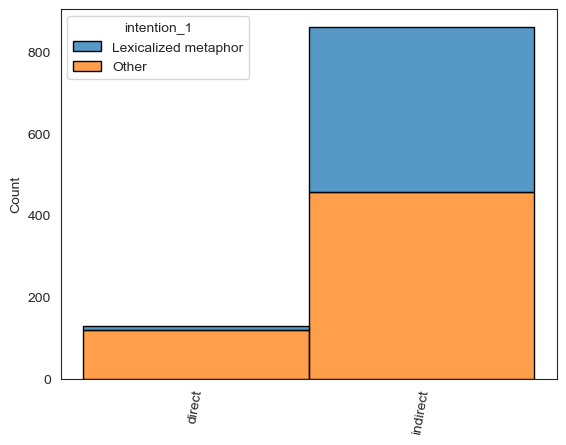

In [12]:
# TYPE DISTRIBUTION: Lexicalized metaphor vs other intentions

# Plot the data
h = sns.histplot(data=Comparison, hue='intention_1', x='type', multiple="stack", edgecolor="k")

# Formatting
h.set(xlabel=None)
plt.xticks(rotation=80)

# Display plot
plt.show()

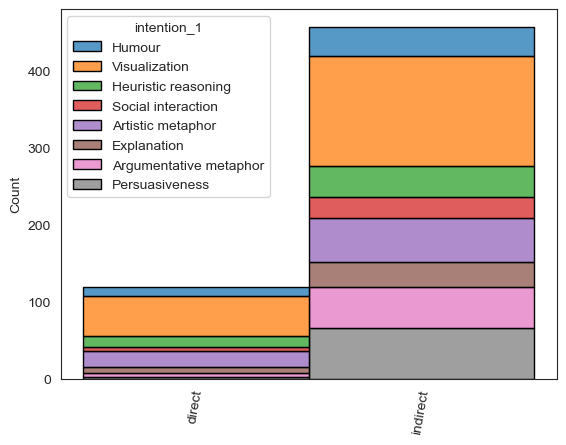

In [13]:
# TYPE DISTRIBUTION: individual intention categories, except Lexicalized metaphor

# Plot the data
h = sns.histplot(data=All_exc_LM, hue='intention_1', x='type', multiple="stack", edgecolor="k")

# Formatting
h.set(xlabel=None)
plt.xticks(rotation=80)

# Display plot
plt.show()

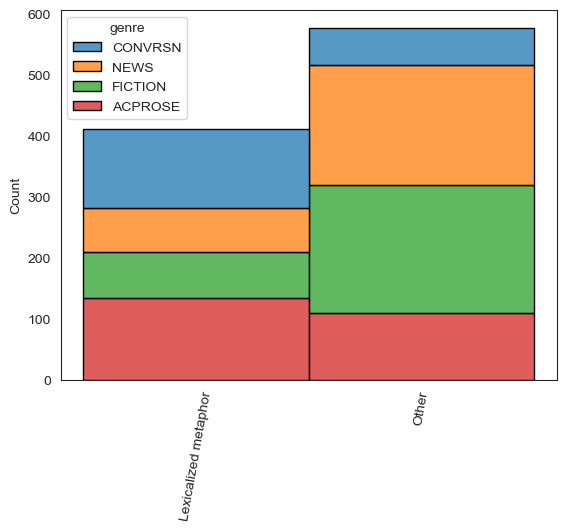

In [5]:
# GENRE DISTRIBUTION: Lexicalized metaphor vs other intentions

# Plot the data
h = sns.histplot(data=Comparison, hue='genre', x='intention_1', multiple="stack", edgecolor="k")

# Formatting
h.set(xlabel=None)
plt.xticks(rotation=80)

# Display plot
plt.show()

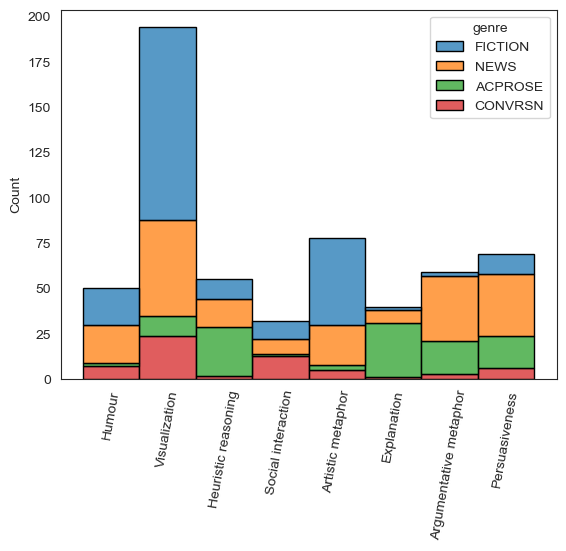

In [4]:
# GENRE DISTRIBUTION: individual intention categories, except Lexicalized metaphor

# Plot the data
h = sns.histplot(data=All_exc_LM, hue='genre', x='intention_1', multiple="stack", edgecolor="k")

# Formatting
h.set(xlabel=None)
plt.xticks(rotation=80)

# Display plot
plt.show()

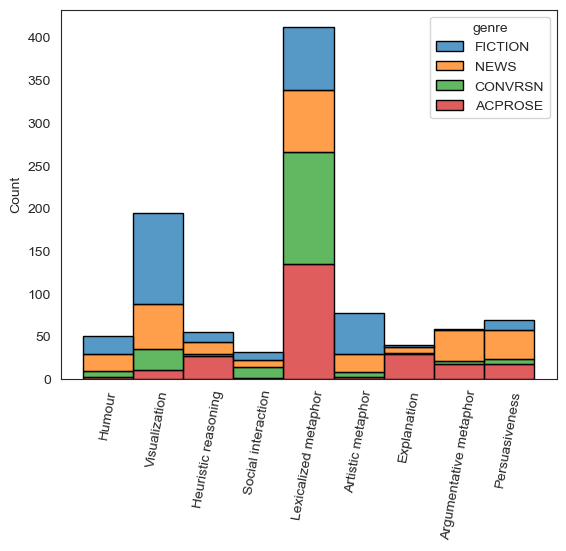

In [15]:
# GENRE DISTRIBUTION: individual intention categories

# Plot the data
h = sns.histplot(data=Dataset, hue='genre', x='intention_1', multiple="stack", edgecolor="k")

# Formatting
h.set(xlabel=None)
plt.xticks(rotation=80)

# Display plot
plt.show()

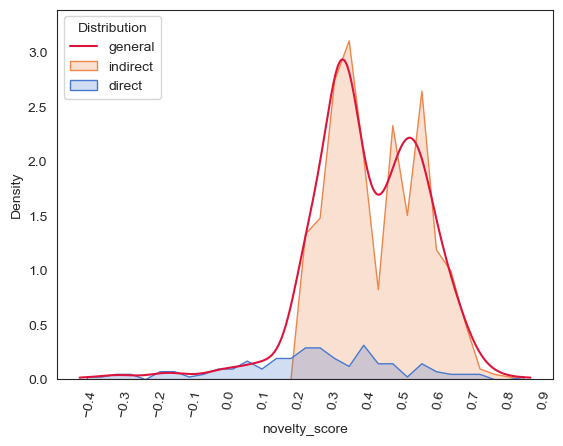

In [14]:
# DISTRIBUTION of NOVELTY SCORES (DIRECT and INDIRECT metaphors)

# Plot the general distribution
a = sns.histplot(Dataset, x="novelty_score", kde=True, fill=False, color="white", stat='density')
a.lines[0].set_color('crimson')

# Plot poligonal coloured areas, representing the distributions per metaphor type
t = sns.histplot(Dataset, x="novelty_score", hue="type", element="poly", palette="muted", stat='density')
t.set_xticks([-0.4, -0.3, -0.20, -0.10, 0.0, 0.1, 0.20, 0.30, 0.40, 0.5, 0.6, 0.7, 0.8, 0.9])

# Formatting
plt.xticks(rotation=80)
plt.legend(title='Distribution', loc='upper left', labels=['general','indirect', 'direct'])

# Display plot
plt.show()

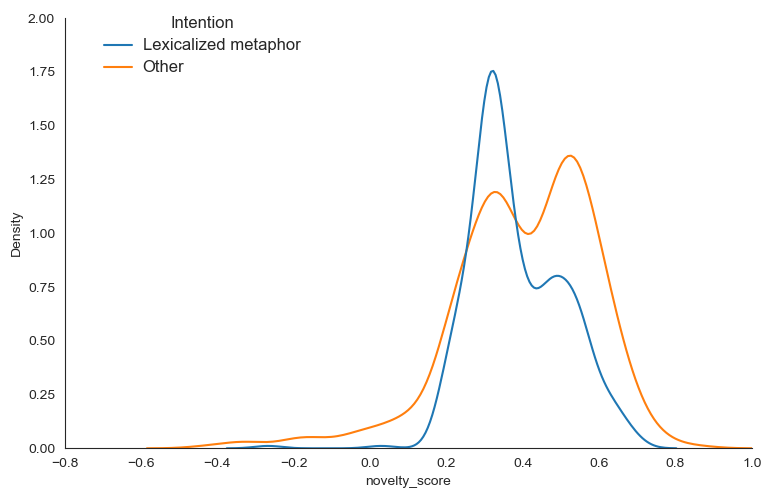

In [7]:
# DISTRIBUTION of NOVELTY SCORES: Lexicalized metaphor vs other intentions

# Plot data
h = sns.displot(Comparison, x="novelty_score", kind='kde', hue='intention_1', aspect=5/3.2)

# Formatting
plt.xlim(-0.8, 1)
plt.ylim(0, 2)
sns.move_legend(h, 'upper left', bbox_to_anchor=(0.1, 1))
h._legend.set_title('Intention')
plt.setp(h._legend.get_title(), fontsize=12)
plt.setp(h._legend.get_texts(), fontsize=12)

# Display plot
plt.show()

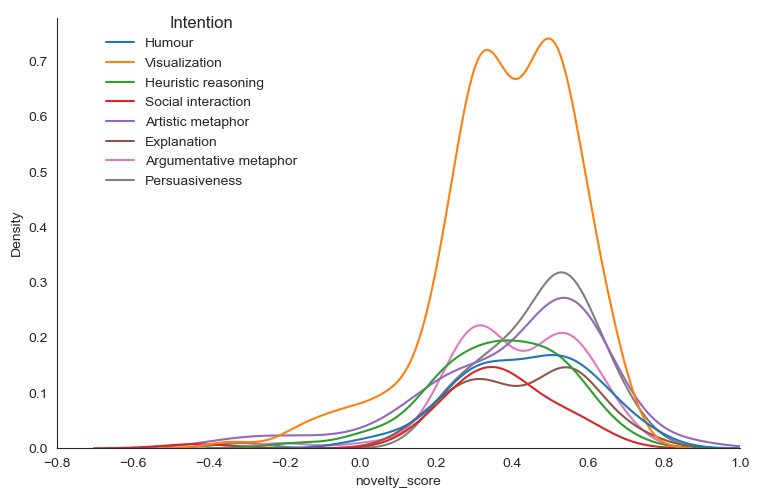

In [8]:
# DISTRIBUTION of NOVELTY SCORES: individual intention categories, except Lexicalized metaphor

# Plot data
g = sns.displot(All_exc_LM, x="novelty_score", hue='intention_1' , kind='kde', aspect=5/3.2)

# Formatting
g._legend.set_title('Intention')
plt.setp(g._legend.get_title(), fontsize=12)
plt.setp(g._legend.get_texts(), fontsize=12)
sns.move_legend(g, 'upper left', bbox_to_anchor=(0.1, 1))
plt.xlim(-0.8, 1)

# Display plot
plt.show()

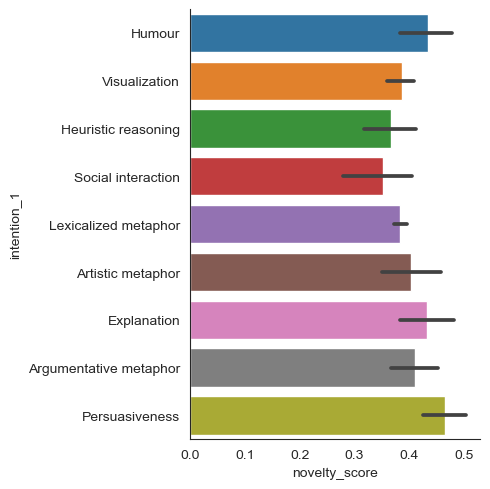

In [9]:
# MEAN novelty scores per intention category

# Plot data
sns.catplot(data=Dataset, kind="bar", x="novelty_score", y="intention_1")

# Display plot
plt.show()